In [1]:
# Nuthara

Pre processing the dataset

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
df = pd.read_csv('Kickstarter.csv', encoding = 'latin-1')
df.shape

(26128, 8)

In [4]:
# checking for missing values
df.fillna(np.nan)
df.isnull().sum()

name          10128
category      10128
deadline      10128
goal          10128
pledged       10128
status        10128
backers       10128
Unnamed: 7    26123
dtype: int64

In [5]:
# data contains in only 16,000 rows
# hence dropping the rest of the rows
df.dropna(how='all',inplace=True)
# df.isnull().sum()

In [6]:
# droping the rows that have shifted and conains errorneous values for category column
df= df[(df['Unnamed: 7'].isnull())]
# df

In [7]:
# dropping the Unnamed column
df.dropna(axis =1,how= 'all', inplace=True)
# df.shape
df

,name,category,deadline,goal,pledged,status,backers
0,Safer Home,Hardware,3/7/2015 5:52,50000,0,failed,0
1,Gizbee Unlimited Removable Storage for Your T...,Gadgets,25/3/2016 19:30,87000,2030,canceled,15
2,Diposta - liberating people from their postal ...,Web,23/8/2016 13:18,100000,141,failed,3
3,Best Spray Bottle Ever - SureShot,Gadgets,7/3/2015 16:57,25000,3,failed,3
4,Fishtacular - The Ultimate Fishing Tool (Cance...,Apps,25/5/2015 20:04,50000,11336,canceled,19
...,...,...,...,...,...,...,...
15995,Safeskoolz: Safety & Emergency Communication F...,Apps,9/8/2014 5:35,367000,447,failed,19
15996,The Beer Machine that keeps track of who's dri...,Hardware,7/12/2016 2:00,107500,11564,live,33
15997,CopCritic App: Helping Police & Public Communi...,Apps,4/11/2016 4:20,30000,101,failed,2
15998,Geeftz for Christmas (Canceled),Apps,3/1/2015 16:52,3000,1222,canceled,26


Cleaning the Deadline column

In [8]:
# function to extract the Year from the deadline 

def extract_year(deadline):

    date = deadline.split(' ')[0]
    # print(date)
    year = date.split('/')[-1]
    return(year)

In [9]:
# applying the function to the column deadline using lambda function

df['deadline '] = df['deadline '].apply(lambda x: extract_year(x))
# df

In [10]:
# replace column names with colNames

colNames = ['Name', 'Category', 'Deadline', 'Goal', 'Pledged', 'Status', 'Backers']
df.columns = colNames

Check Category Column

In [11]:
df['Category'].unique()

array(['Hardware', 'Gadgets', 'Web', 'Apps', 'Technology', 'Software',
       'Flight', 'Makerspaces', 'Fabrication Tools', 'Sound',
       'DIY Electronics', 'Camera Equipment', '3D Printing', 'Wearables',
       'Space Exploration', 'Robots'], dtype=object)

In [12]:
# groupby the category type and get the number of entries in each 
gropuby_category = df.groupby('Category').size()
gropuby_category


Category
3D Printing           338
Apps                 2986
Camera Equipment      187
DIY Electronics       419
Fabrication Tools     127
Flight                212
Gadgets              1362
Hardware             1905
Makerspaces           129
Robots                265
Software             1558
Sound                 302
Space Exploration     160
Technology           3560
Wearables             536
Web                  1949
dtype: int64

Show the Change in Categories over the Years

In [13]:
# get the count of each category on each year
Categories = df['Category'].unique()
Years = df['Deadline'].unique()
dftemp = df.groupby(['Category', 'Deadline', 'Status']).size().reset_index(name='Count')
dftemp

,Category,Deadline,Status,Count
0,3D Printing,2013,canceled,2
1,3D Printing,2013,failed,2
2,3D Printing,2013,successful,12
3,3D Printing,2014,canceled,18
4,3D Printing,2014,failed,38
...,...,...,...,...
298,Web,2016,live,23
299,Web,2016,successful,29
300,Web,2016,suspended,6
301,Web,2017,canceled,1


In [14]:
# total number of projects initialized in each category over years
total_over_years = df.groupby(['Category', 'Deadline']).size().reset_index(name='Count')
total_over_years

,Category,Deadline,Count
0,3D Printing,2013,16
1,3D Printing,2014,86
2,3D Printing,2015,153
3,3D Printing,2016,81
4,3D Printing,2017,2
...,...,...,...
104,Web,2013,3
105,Web,2014,495
106,Web,2015,953
107,Web,2016,482


In [15]:
num_per_year = df.groupby('Deadline').size().reset_index(name='Total_projects')
num_per_year

,Deadline,Total_projects
0,2009,27
1,2010,128
2,2011,269
3,2012,479
4,2013,1051
5,2014,3624
6,2015,5958
7,2016,4330
8,2017,129


In [16]:
merged_total = pd.merge(total_over_years,num_per_year,on='Deadline', how='left')
merged_total

,Category,Deadline,Count,Total_projects
0,3D Printing,2013,16,1051
1,3D Printing,2014,86,3624
2,3D Printing,2015,153,5958
3,3D Printing,2016,81,4330
4,3D Printing,2017,2,129
...,...,...,...,...
104,Web,2013,3,1051
105,Web,2014,495,3624
106,Web,2015,953,5958
107,Web,2016,482,4330


In [17]:
# get the percentage of initialized projects on each category over years
# percentage = number of projects on category_1 in year_1 / total projects in year_1

merged_total['Percentage'] = (merged_total['Count'])/(merged_total['Total_projects'])

In [18]:
merged_total

,Category,Deadline,Count,Total_projects,Percentage
0,3D Printing,2013,16,1051,0.015224
1,3D Printing,2014,86,3624,0.023731
2,3D Printing,2015,153,5958,0.025680
3,3D Printing,2016,81,4330,0.018707
4,3D Printing,2017,2,129,0.015504
...,...,...,...,...,...
104,Web,2013,3,1051,0.002854
105,Web,2014,495,3624,0.136589
106,Web,2015,953,5958,0.159953
107,Web,2016,482,4330,0.111316


In [19]:
temp = merged_total
dfpivot_1 = temp.pivot(index='Deadline', columns='Category',values='Percentage').fillna(0)
dfpivot_1 = dfpivot_1.reset_index()
dfpivot_1.columns.name = None
dfpivot_1

,Deadline,3D Printing,Apps,Camera Equipment,DIY Electronics,Fabrication Tools,Flight,Gadgets,Hardware,Makerspaces,Robots,Software,Sound,Space Exploration,Technology,Wearables,Web
0,2009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.185185,0.000000,0.000000,0.666667,0.000000,0.000000,0.148148,0.000000,0.000000
1,2010,0.000000,0.000000,0.000000,0.007812,0.007812,0.000000,0.000000,0.226562,0.000000,0.000000,0.593750,0.000000,0.007812,0.156250,0.000000,0.000000
2,2011,0.000000,0.007435,0.003717,0.007435,0.007435,0.000000,0.000000,0.234201,0.003717,0.003717,0.260223,0.000000,0.007435,0.464684,0.000000,0.000000
3,2012,0.000000,0.008351,0.002088,0.018789,0.002088,0.008351,0.006263,0.221294,0.002088,0.025052,0.175365,0.012526,0.018789,0.498956,0.000000,0.000000
4,2013,0.015224,0.004757,0.006660,0.012369,0.002854,0.001903,0.007612,0.380590,0.001903,0.011418,0.145576,0.002854,0.007612,0.394862,0.000951,0.002854
5,2014,0.023731,0.173013,0.011313,0.027870,0.007174,0.014073,0.070088,0.138245,0.006347,0.015177,0.096026,0.016832,0.007450,0.224890,0.031181,0.136589
6,2015,0.025680,0.218194,0.012924,0.028030,0.007889,0.015945,0.102887,0.077711,0.009567,0.019134,0.078550,0.018295,0.010910,0.177409,0.036925,0.159953
7,2016,0.018707,0.236952,0.013164,0.029099,0.010855,0.013626,0.108083,0.075289,0.010393,0.015473,0.077598,0.027252,0.010624,0.196998,0.044573,0.111316
8,2017,0.015504,0.170543,0.023256,0.000000,0.000000,0.007752,0.124031,0.093023,0.000000,0.031008,0.038760,0.038760,0.015504,0.248062,0.069767,0.124031


In [20]:
# creating a pivot table to plot the graph to show the category distribution

dfpivot_2 = merged_total.pivot(index='Deadline', columns='Category',values='Count').fillna(0)
dfpivot_2 = dfpivot_2.reset_index()
dfpivot_2.columns.name = None
dfpivot_2

,Deadline,3D Printing,Apps,Camera Equipment,DIY Electronics,Fabrication Tools,Flight,Gadgets,Hardware,Makerspaces,Robots,Software,Sound,Space Exploration,Technology,Wearables,Web
0,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,18.0,0.0,0.0,4.0,0.0,0.0
1,2010,0.0,0.0,0.0,1.0,1.0,0.0,0.0,29.0,0.0,0.0,76.0,0.0,1.0,20.0,0.0,0.0
2,2011,0.0,2.0,1.0,2.0,2.0,0.0,0.0,63.0,1.0,1.0,70.0,0.0,2.0,125.0,0.0,0.0
3,2012,0.0,4.0,1.0,9.0,1.0,4.0,3.0,106.0,1.0,12.0,84.0,6.0,9.0,239.0,0.0,0.0
4,2013,16.0,5.0,7.0,13.0,3.0,2.0,8.0,400.0,2.0,12.0,153.0,3.0,8.0,415.0,1.0,3.0
5,2014,86.0,627.0,41.0,101.0,26.0,51.0,254.0,501.0,23.0,55.0,348.0,61.0,27.0,815.0,113.0,495.0
6,2015,153.0,1300.0,77.0,167.0,47.0,95.0,613.0,463.0,57.0,114.0,468.0,109.0,65.0,1057.0,220.0,953.0
7,2016,81.0,1026.0,57.0,126.0,47.0,59.0,468.0,326.0,45.0,67.0,336.0,118.0,46.0,853.0,193.0,482.0
8,2017,2.0,22.0,3.0,0.0,0.0,1.0,16.0,12.0,0.0,4.0,5.0,5.0,2.0,32.0,9.0,16.0


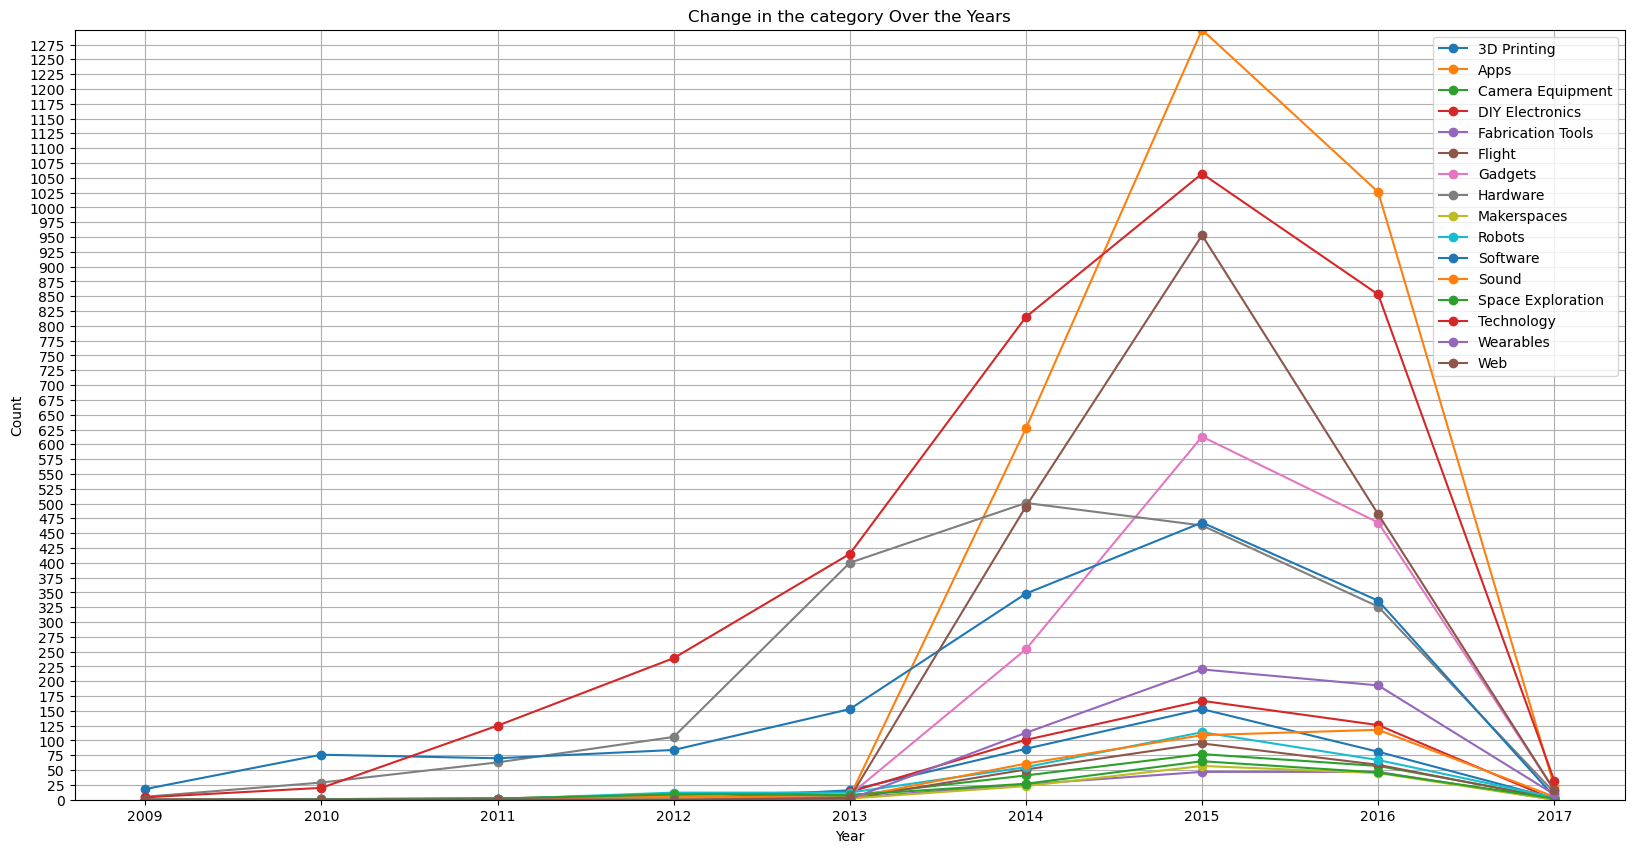

In [21]:
# plotting the graph
# line chart to track the change of categories over years
ax = dfpivot_2.plot(kind='line', figsize=(20,10),marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Change in the category Over the Years')

plt.xticks(dfpivot_2.index, dfpivot_2['Deadline'], rotation=0)
plt.yticks(range(0, 1300, 25))

# Set y-axis limits from 0 to 100
plt.ylim(0,1300) 
plt.grid(True)
plt.savefig('Change in the categories over years-line.png')

# Show the plot
plt.show()


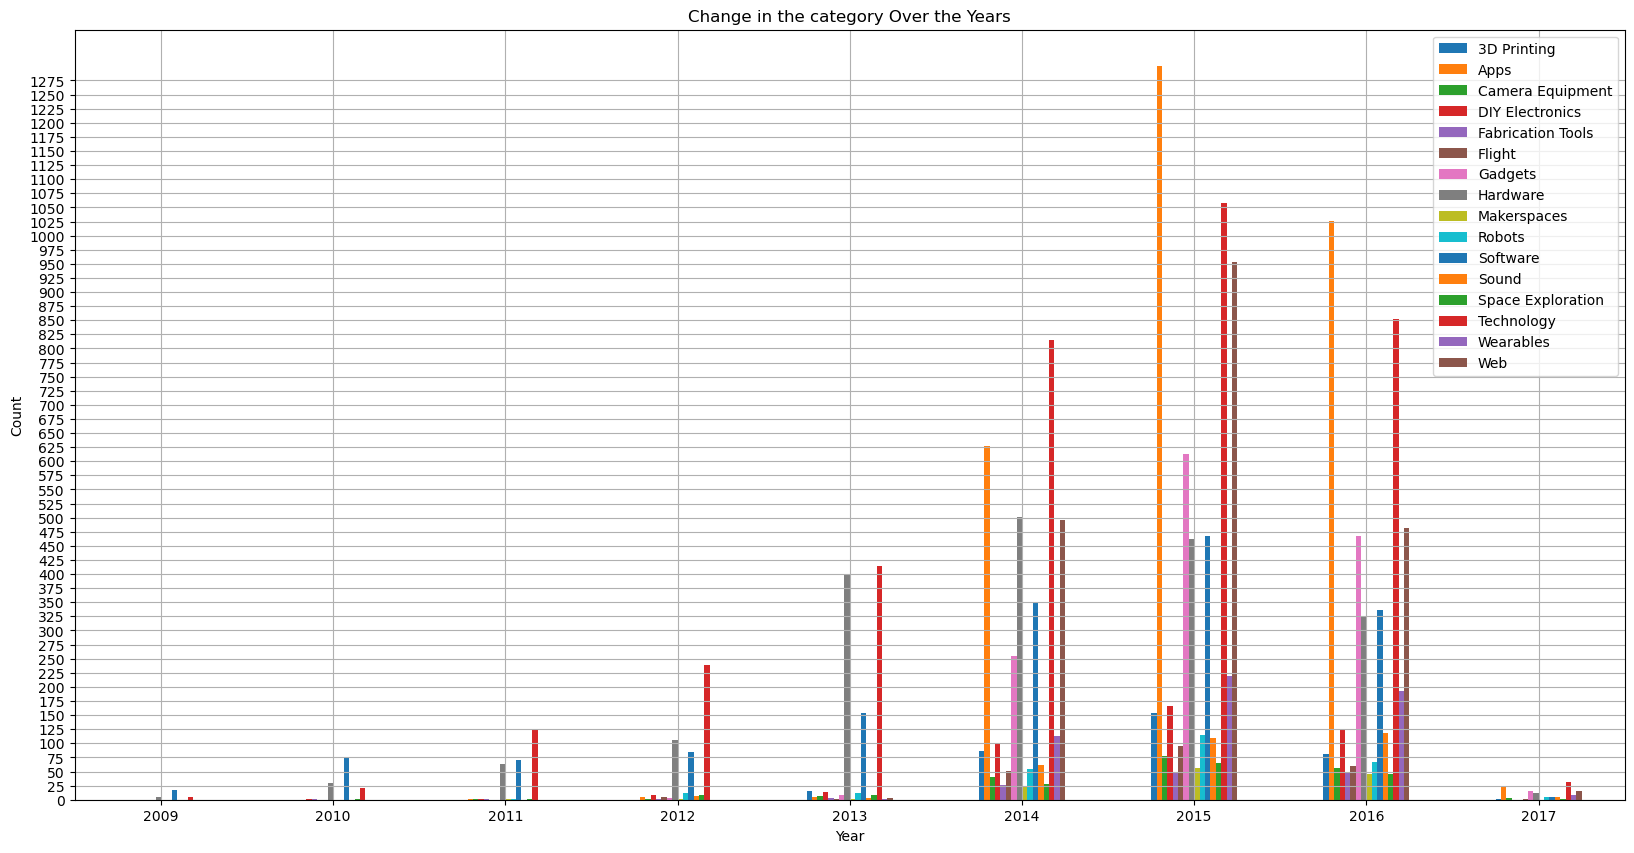

In [22]:
# plotting the graph
# bar chart to track the change of categories over years

ax = dfpivot_2.plot(kind='bar', figsize=(20,10))
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Change in the category Over the Years')

plt.xticks(dfpivot_2.index, dfpivot_2['Deadline'], rotation=0)
plt.yticks(range(0, 1300, 25))

# Set y-axis limits from 0 to 100
plt.grid(True)

# saving the figure
plt.savefig('Change in the categories over years-bar.png')
# Show the plot
plt.show()


0.094662638469285


C:\Users\NUTHARA\AppData\Local\Temp\ipykernel_18312\631008147.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_1.append(new_row, ignore_index=True)


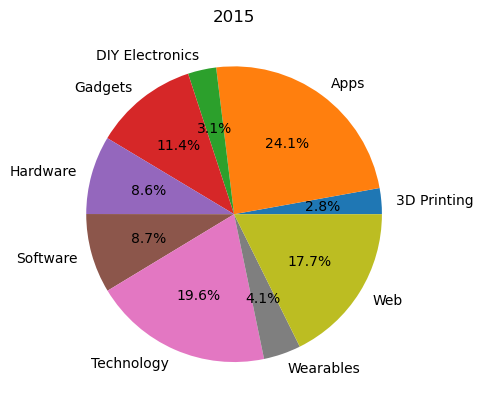

0.09284064665127022


C:\Users\NUTHARA\AppData\Local\Temp\ipykernel_18312\631008147.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_1.append(new_row, ignore_index=True)


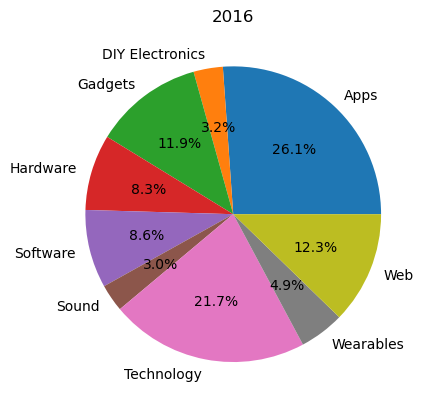

C:\Users\NUTHARA\AppData\Local\Temp\ipykernel_18312\631008147.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_1.append(new_row, ignore_index=True)


0.07933194154488518


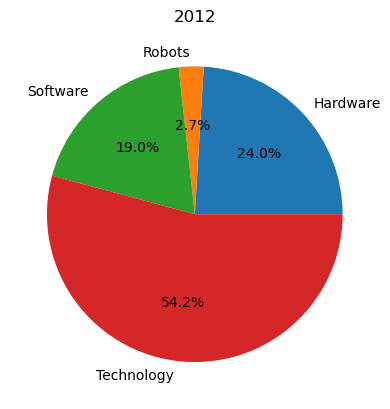

0.04089219330855018


C:\Users\NUTHARA\AppData\Local\Temp\ipykernel_18312\631008147.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_1.append(new_row, ignore_index=True)


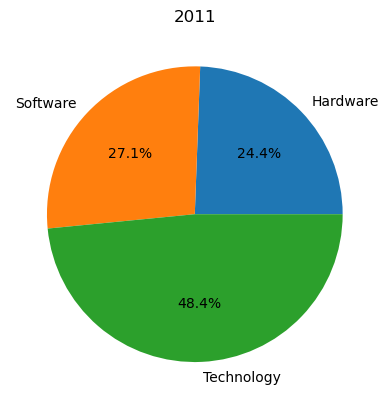

C:\Users\NUTHARA\AppData\Local\Temp\ipykernel_18312\631008147.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_1.append(new_row, ignore_index=True)


0.07836644591611479


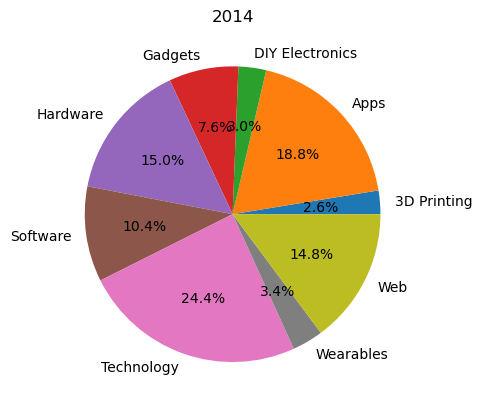

0.07897240723120837


C:\Users\NUTHARA\AppData\Local\Temp\ipykernel_18312\631008147.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_1.append(new_row, ignore_index=True)


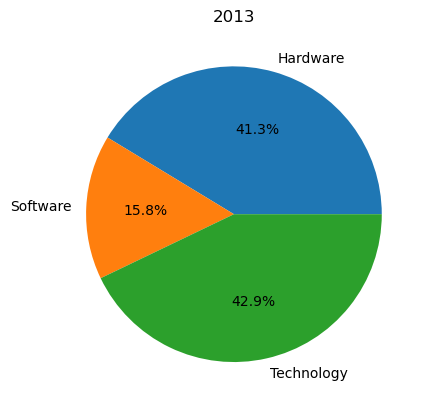

C:\Users\NUTHARA\AppData\Local\Temp\ipykernel_18312\631008147.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_1.append(new_row, ignore_index=True)


0.03875968992248062


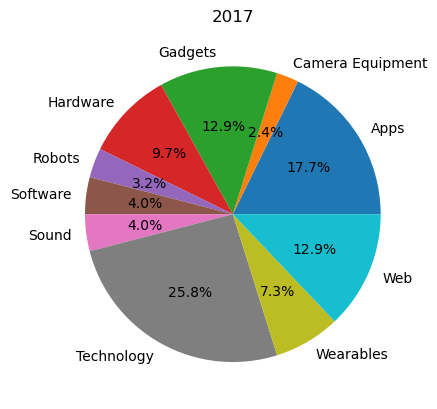

C:\Users\NUTHARA\AppData\Local\Temp\ipykernel_18312\631008147.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_1.append(new_row, ignore_index=True)


0.0234375


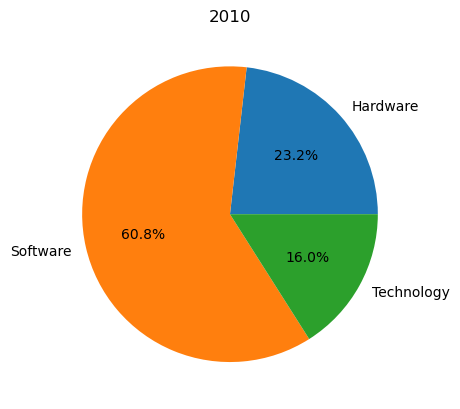

0.0


C:\Users\NUTHARA\AppData\Local\Temp\ipykernel_18312\631008147.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_1.append(new_row, ignore_index=True)


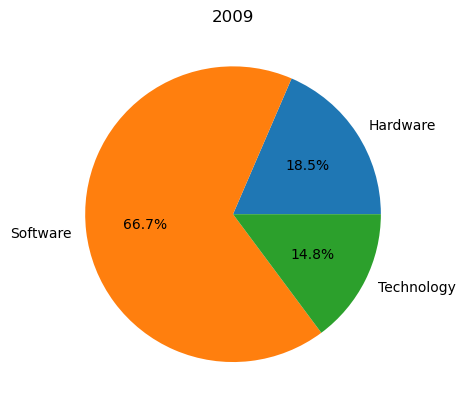

In [23]:

# plotting small pie chart for each year
temp_df= merged_total.loc[:,['Category','Deadline','Percentage']]


for year in Years:

    temp_df_1= temp_df[temp_df['Deadline']==year]
    less_than_1= temp_df_1[temp_df_1['Percentage']< 0.02]
    temp_df_1 = temp_df_1[~(temp_df_1['Percentage']< 0.02)]

    other = less_than_1['Percentage'].sum()
    print(other)
    # New row data
    new_row = {'Category': 'Other', 'Percentage': other}   
    temp_df_1.append(new_row, ignore_index=True)
    # plotting the graph
    # Plot the pie chart

    plt.title(year)
    plt.pie(temp_df_1['Percentage'], labels=temp_df_1['Category'], autopct='%1.1f%%')

    plt.savefig(year+'.png')
    # Show the plot
    plt.show()
